# Training Convergence Plots for Learning Punctuation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
import pickle
import os
print(os.getcwd())
import time
import gc
import torch
import bisect

from conv_plots_funcs import train_conv_plots

#import empirical cdf
# import sys
# sys.path.append(os.path.abspath('../../src'))

from data_processing import gen_ckpt_steps, move_dict_to_device, get_other_err, get_mop_ratios_ckpt, compute_ratio
# sys.path.append(os.path.abspath('..'))

from check_ecdf import get_empirical_cdf

/home/sultand/TFs_do_KF_ICL/src
/home/sultand/TFs_do_KF_ICL/src
/home/sultand/TFs_do_KF_ICL/src
Using device: cuda
Using device: cuda


In [2]:
valA = "ortho"
valC = "_ident_C"
state_dim = 5
ckpt_step = 8
batch_size = 512 #512 #4096
gpus=2
num_val_sys = 25
experiment = "250124_190131.5710d5_multi_sys_trace_ortho_state_dim_5_ident_C_lr_1.584893192461114e-05_num_train_sys_40000" # experiment to load
datasource = "val"
nope = True


compute_more_ckpts = False

/home/sultand/TFs_do_KF_ICL/outputs/train_conv/training_dist_comparison_val_ortho_state_dim_5_val_sys_25_1738040144.8261712.pdf
quantiles 5 path exists?: True
ckpt_steps: [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000]
quantiles already exist for 250125_204545.a2cee4_multi_sys_trace_ortho_state_dim_5_ident_C_lr_1.3207437987531975e-05_num_train_sys_40000, and single_system=True
keys in the file: ['pred_ckpts', 'quantiles']
quantiles shape after load: (28, 3)
loading quantiles_5 and quantiles_20
quantiles shape (28, 3)
no title for single system


(array([0.36914712, 0.67112   , 1.0844761 ], dtype=float32),
 [2560000,
  5120000,
  7680000,
  10240000,
  12800000,
  15360000,
  17920000,
  20480000,
  23040000,
  25600000,
  28160000,
  30720000,
  33280000,
  35840000,
  38400000,
  40960000,
  43520000,
  46080000,
  48640000,
  51200000,
  53760000,
  56320000,
  58880000,
  61440000,
  64000000,
  66560000,
  69120000,
  71680000])

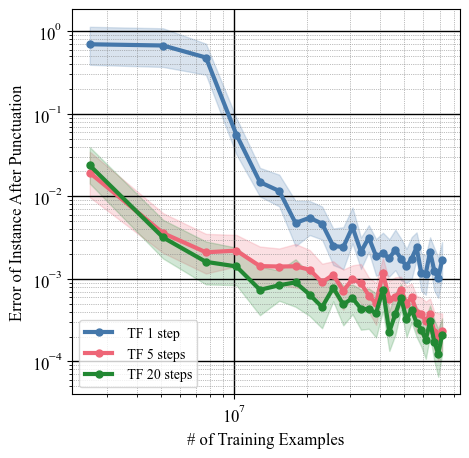

In [3]:
kal_ckpt = 40650 #60000 #81000 #28500
train_conv_plots([experiment], ["Identity"], [kal_ckpt], valA, valC, num_val_sys, compute_more_ckpts, None, 5000, 140000, 5000, state_dim, single_system=True, nope=nope, batch_size=batch_size, gpus=gpus)

# Zero Cut Plot

In [3]:
valA = "gaussA"
valC = "_gauss_C"
batch_size = 512 #512 #4096
gpus=1
num_val_sys = 25
experiment_zero_train = "250127_001511.3ac954_multi_sys_trace_zero_cut_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000" # experiment to load
experiment_multi_train = "250114_202420.3c1184_multi_sys_trace_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000"
kal_ckpt_zero_train = 90000 
kal_ckpt_multi_train = 180000
datasource = "val"
state_dim = 10

In [10]:
kal_err_zero_train = get_other_err(valA, valC, kal_ckpt_zero_train, experiment_zero_train, "Kalman_rem", state_dim, zero_cut=True)

tf_err_zero_train, pred_ckpt = get_mop_ratios_ckpt(valA, valC, kal_ckpt_zero_train, experiment_zero_train, state_dim, zero_cut=True)

ols_irs = []
for ir in range(1, 4):
    ols_ir = get_other_err(valA, valC, kal_ckpt_zero_train, experiment_zero_train, f"OLS_ir_{ir}", state_dim, zero_cut=True)
    ols_irs.append(compute_ratio(None, ols_ir, kal_err_zero_train).cpu().numpy())

tf_err_rat_zero_train = compute_ratio(None, tf_err_zero_train, kal_err_zero_train)
tf_err_rat_zero_train = tf_err_rat_zero_train.cpu().numpy()
print("shape of tf_err_rat_zero_train: ", tf_err_rat_zero_train.shape)

/home/sultand/TFs_do_KF_ICL/outputs/GPT2/250127_001511.3ac954_multi_sys_trace_zero_cut_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_gauss_C_step=90000.ckpt/zero_cut_gaussA_state_dim_10_err_lss.pkl
loaded Kalman_rem error
/home/sultand/TFs_do_KF_ICL/outputs/GPT2/250127_001511.3ac954_multi_sys_trace_zero_cut_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_gauss_C_step=90000.ckpt/zero_cut_gaussA_state_dim_10_err_lss.pkl
Loaded Transformer Errors
/home/sultand/TFs_do_KF_ICL/outputs/GPT2/250127_001511.3ac954_multi_sys_trace_zero_cut_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_gauss_C_step=90000.ckpt/zero_cut_gaussA_state_dim_10_err_lss.pkl
loaded OLS_ir_1 error
ratios shape: torch.Size([25, 2000, 251])
ratios shape after median: torch.Size([25, 251])
/home/sultand/TFs_do_KF_ICL/outputs/GPT2/250127_001511.3ac954_multi_sys_trace_zero_cut_gaussA_state_dim_10_g

In [9]:
tf_err_multi_train, pred_ckpt = get_mop_ratios_ckpt(valA, valC, kal_ckpt_multi_train, experiment_multi_train, state_dim, zero_cut=True)

an_sim_err_multi_train = get_other_err(valA, valC, kal_ckpt_multi_train, experiment_multi_train, "Analytical_Simulation", state_dim, zero_cut=True)
an_sim_err_multi_train = compute_ratio(None, an_sim_err_multi_train, kal_err_zero_train).cpu().numpy()

# ols_irs = []
# for ir in range(1, 4):
#     ols_ir = get_other_err(valA, valC, kal_ckpt_multi_train, experiment_zero_train, f"OLS_ir_{ir}", state_dim, zero_cut=True)
#     ols_irs.append(compute_ratio(None, ols_ir, kal_err_zero_train).cpu().numpy())

tf_err_rat_multi_train = compute_ratio(None, tf_err_multi_train, kal_err_zero_train)
tf_err_rat_multi_train = tf_err_rat_multi_train.cpu().numpy()
print("shape of tf_err_rat_multi_train: ", tf_err_rat_multi_train.shape)

/home/sultand/TFs_do_KF_ICL/outputs/GPT2/250114_202420.3c1184_multi_sys_trace_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_gauss_C_step=180000.ckpt/zero_cut_gaussA_state_dim_10_err_lss.pkl
Loaded Transformer Errors
/home/sultand/TFs_do_KF_ICL/outputs/GPT2/250114_202420.3c1184_multi_sys_trace_gaussA_state_dim_10_gauss_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_gauss_C_step=180000.ckpt/zero_cut_gaussA_state_dim_10_err_lss.pkl
loaded Analytical_Simulation error
ratios shape: torch.Size([25, 2000, 251])
ratios shape after median: torch.Size([25, 251])
ratios shape: torch.Size([25, 2000, 251])
ratios shape after median: torch.Size([25, 251])
shape of tf_err_rat_multi_train:  (3, 251)


In [12]:
tf_err_rat_zero_train -= 1
tf_err_rat_multi_train -= 1
for ir in range(3):
    ols_irs[ir] -= 1

findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

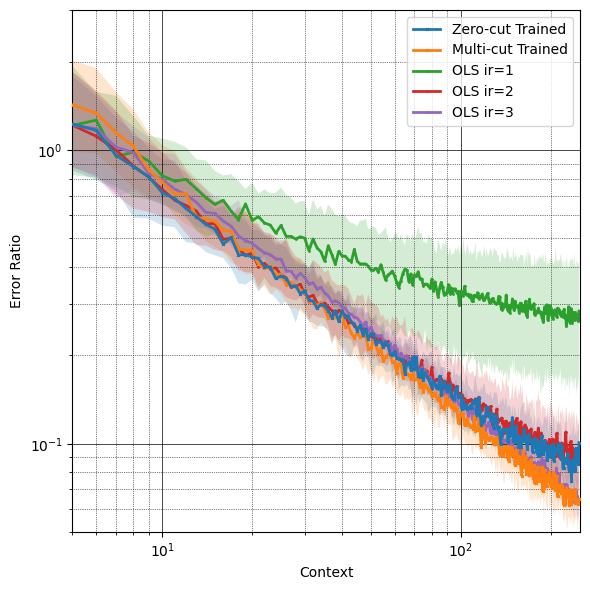

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
context_len = 251

ax.plot(np.arange(context_len), tf_err_rat_zero_train[1], label="Zero-cut Trained", linewidth=2, marker="x", markersize=2, zorder=5)#linestyle="--")
ax.fill_between(np.arange(context_len), tf_err_rat_zero_train[0], tf_err_rat_zero_train[2], alpha=0.2)

ax.plot(np.arange(context_len), tf_err_rat_multi_train[1], label="Multi-cut Trained", linewidth=2, marker="x", markersize=2, zorder=4)#, linestyle="-.")
ax.fill_between(np.arange(context_len), tf_err_rat_multi_train[0], tf_err_rat_multi_train[2], alpha=0.2)

# ax.plot(np.arange(context_len), an_sim_err_multi_train[1], label="Analytical Simulation", linewidth=2, marker=".", markersize=10)
# ax.fill_between(np.arange(context_len), an_sim_err_multi_train[0], an_sim_err_multi_train[2], alpha=0.15)

for ir in range(1, 4):
    ax.plot(np.arange(context_len), ols_irs[ir-1][1], label=f"OLS ir={ir}", linewidth=2, marker=".", markersize=2)
    ax.fill_between(np.arange(context_len), ols_irs[ir-1][0], ols_irs[ir-1][2], alpha=0.2)

ax.set_xlabel("Context")
ax.set_xlim([5, context_len])
ax.set_ylabel("Error Ratio")
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True)
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.set_ylim([5e-2, 3e0])
plt.tight_layout()

plt.show()

